In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [31]:
# 공간 데이터 파일 읽기  
gdf = gpd.read_file("emd.shp", encoding='cp949')  

In [32]:
gdf.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [37]:
gdf['area'] = gdf['geometry'].to_crs('epsg:6933').map(lambda x : round(x.area, 2) ) 

gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry,area
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1...",793209.40
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1...",98895.44
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19...",73326.39
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1...",59448.02
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1...",59443.65
...,...,...,...,...,...
5061,52800380,Baeksan-myeon,백산면,"POLYGON ((934492.435 1747398.266, 934498.181 1...",36481225.08
5062,52800390,Sangseo-myeon,상서면,"POLYGON ((924979.638 1740610.214, 924985.428 1...",51738610.81
5063,52800400,Haseo-myeon,하서면,"POLYGON ((924910.563 1749481.985, 924971.3 174...",43287740.14
5064,52800410,Julpo-myeon,줄포면,"POLYGON ((929554.188 1736493.399, 929554.106 1...",23071418.51


<Axes: >

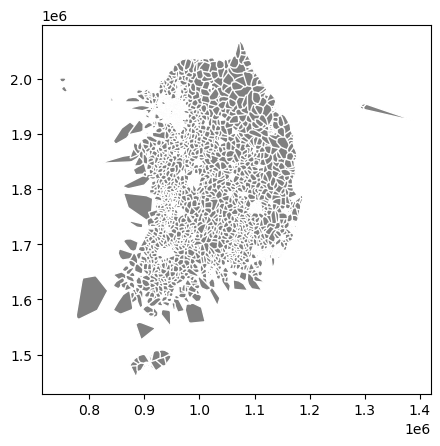

In [38]:
gdf.convex_hull.plot(color='gray', edgecolor="w")

In [39]:
seoul = gdf[gdf['EMD_CD'].str.startswith('11')]

<Axes: >

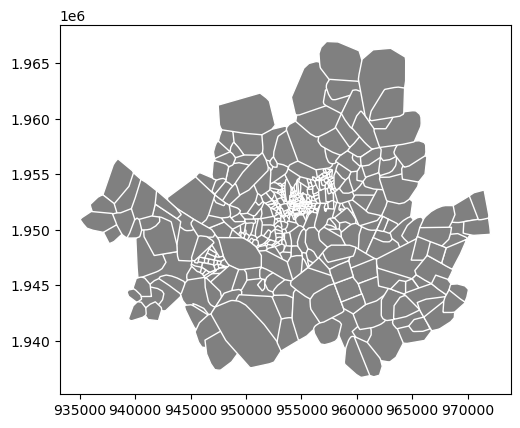

In [40]:
seoul.convex_hull.plot(color='gray', edgecolor="w")

In [41]:
seoul.to_crs('EPSG:4166').to_file(driver='GeoJSON', filename='seoul.geojson')